In [1]:
%env http_proxy=http://proxy-default:3128
%env https_proxy=http://proxy-default:3128

env: http_proxy=http://proxy-default:3128
env: https_proxy=http://proxy-default:3128


In [ ]:
from collections import defaultdict
import random, os
from random import randint
random.seed(7)
import pandas as pd
import numpy  as np
import matplotlib
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import seaborn as sns
import tskit

sns.set_style('ticks')
%config InlineBackend.figure_format = 'retina'
# %config InlineBackend.figure_format = 'svg'

# user_settings = '~/.jupyter/lab/user-settings/@jupyterlab/apputils-extension/themes.jupyterlab-settings'
# if 'JupyterLab Dark' in open(os.path.expanduser(user_settings)).read() or '__vsc_ipynb_file__' in globals():
#     style = {'axes.facecolor': '#111111',
#      'axes.edgecolor': '.99',
#      'axes.labelcolor': '.99',
#      'figure.facecolor': '#111111',
#      'grid.color': '.0',
#      'text.color': '.99',
#      'xtick.color': '.99',
#      'ytick.color': '.99',
#      'patch.edgecolor': 'w',
#     }
#     sns.set_style(style)
#     sns.set_palette('pastel')


# plt.style.use('dark_background')
# import matplotlib
# matplotlib.rcParams['axes.facecolor'] = '#1F1F1F'
# matplotlib.rcParams['figure.facecolor'] = '#1F1F1F'


import geneinfo.utils as utils
from geneinfo.utils import GeneList as glist
import geneinfo.information as gi
import geneinfo.plot as gplt

def stars(p):
    return '*' * int((-np.log10(p / 5) - 1))

In [1]:
gene_lists = utils.GeneListCollection(google_sheet='1JSjSLuto3jqdEnnG7JqzeC_1pUZw76n7XueVAYrUOpk')
gene_lists

| label | description |
|:---|:---|
| **all_npx** | all NPX genes |
| **neuron_genome_proteome** | Neuron proteome (whole genome) |
| **neuron_npx_proteome** | NPX neuron proteome |
| **matos_neuron** | Matos neuron genes |
| **matos_common** | Matos neuron genes expressed in spermatids |
| **hpa_brain_prot** | Brain genes form Human protein atlas |
| **meritxell_spermatid_expr** |  |
| **mult_copy** | Multi copy genes |
| **primate_ampl_multi** | Ampliconic or multicopy in some primates |
| **gametologs** | Gametologs in some primates |
| **old_cDEG** | Old cDEG |
| **cDEG** | The rerun cDEGs |
| **cDEG_alt** |  |
| **Old nDEG** | old nDEG |
| **nDEG** | nDEG |
| **xi** | Subject to somatic X inactivation (XI) |
| **xi_escape** | Escaping somatic X inactivation (XI) |
| **xi_uncertain** | cDEG and Xi escape |
| **xi_any_evidence** | allDEG and Xi escape |
| **expr_mod_xi_copynr_fibrobl** | Xi escapers in either ECH,  hama or hum-nean |
| **expr_mod_xi_copynr_lcl** | Xi escapers in ECH or hum-nean |
| **expr_mod_xi_copynr** | Xi escapers  in hama or hum-nean |
| **pure_hama** | Xi escapers  in hum-nean |
| **hum_nean_admix** | Xi escapers  in ECH90 |
| **ari_relate_EUR** | Xi escapers  in hama |
| **ari_relate_ASIA** | Xi escaping (primate)  gametologs |
| **ari_relate_AFR** | Xi escaping (primate)  gametologs in hum-nean |
| **ari_nonPUR** | Xi escaping (primate)  gametologs in hama |
| **ari_relate_PUR** | Xi escape in ari_nonPUR |
| **ari_all** | Xi escape in accel_reg_simiiformes_br |
| **candidates** | X genes uncertain XI status |
| **ech75_regions** | Union of certain  and uncertain  XI status |
| **ech90_regions** | Expression  modulated by Xi copy number (Fibroblast) |
| **accel_reg_simiiformes_br** | Expression  modulated by Xi copy number (LCL) |
| **my_primate_codeml** | Expression  modulated by Xi copy number (Fibroblast or LCL) |
| **reg_sa_pheno** |  |
| **sfari_all_conf** | Genes in 95% pure hamadryas regions in Gog |
| **intel_seiz_lang** | Human-Neanderthal introgression |
| **intelect_disabil** |  |
| **Xbrain** |  |

## 1000 genomes meta data

In [2]:
%run meta_data.py

Loaded: populations, regions, reg_pop_map, reg_pop_map

label                                    name              region
  ASW                African Ancestry in SW U              Africa
  ESN                         Esan in Nigeria              Africa
  GWD    Gambian in Western Division – Mandin              Africa
  LWK                    Luhya in Webuye, Ken              Africa
  MSL                    Mende in Sierra Leon              Africa
  YRI                Yoruba in Ibadan, Nigeri              Africa
  BEB                    Bengali in Banglades           SouthAsia
  GIH Gujarati Indians in Houston, Texas, USA           SouthAsia
  PJL             Punjabi in Lahore, Pakistan           SouthAsia
  CDX     Chinese Dai in Xishuangbanna, China           EastAsian
  CHB            Han Chinese in Beijing, Chin           EastAsian
  CHS                        Han Chinese Sout           EastAsian
  JPT                Japanese in Tokyo, Japan           EastAsian
  KHV        Kinh in

In [15]:
# pop_names = {
# 'ASW': 'African Ancestry in SW U',
# 'ESN': 'Esan in Nigeria',
# 'GWD': 'Gambian in Western Division – Mandin',
# 'LWK': 'Luhya in Webuye, Ken',
# 'MSL': 'Mende in Sierra Leon',
# 'YRI': 'Yoruba in Ibadan, Nigeri',
# 'BEB': 'Bengali in Banglades',
# 'GIH': 'Gujarati Indians in Houston, Texas, USA',
# 'PJL': 'Punjabi in Lahore, Pakistan',
# 'CDX': 'Chinese Dai in Xishuangbanna, China',
# 'CHB': 'Han Chinese in Beijing, Chin',
# 'CHS': 'Han Chinese Sout',
# 'JPT': 'Japanese in Tokyo, Japan',
# 'KHV': 'Kinh in Ho Chi Minh City, Vietna',
# 'STU': 'Sri Lankan Tamil in the',
# 'ITU': 'Indian Telugu in the U.K',
# 'GBR': 'British From England and Scotlan',
# 'FIN': 'Finnish in Finla',
# 'IBS': 'Iberian Populations in Spain',
# 'TSI': 'Toscani in Itali',
# 'PUR': 'Puerto Rican in Puerto Rico',
# 'ACB': 'African Caribbean in Barbado',
# 'MXL': 'Mexican Ancestry in Los Angeles CA U',
# 'CLM': 'Colombian in Medellín, Colombia',
# 'PEL': 'Peruvian in Lima Per',
# }
# african = ['ASW', 'ESN', 'GWD', 'LWK', 'MSL', 'YRI']
# east_asian = ['CDX', 'CHB', 'CHS', 'JPT', 'KHV']
# south_asian = ['PJL', 'BEB', 'GIH', 'STU', 'ITU']
# european = ['GBR', 'FIN', 'IBS', 'TSI']
# central_south_american = ['MXL', 'CLM', 'PEL',]
# caribiian = ['PUR', 'ACB']

# reg_pop_map = {'Africa': african, 'EastAsian': east_asian, 'SouthAsia': south_asian,
#                'Europe': european, 'CentralSouthAmerica': central_south_american,
#                'Caribia': caribiian}
# pop_reg_map = {pop: reg for reg, pops in reg_pop_map.items() for pop in pops}

# populations = list(pop_reg_map.keys())
# regions = list(reg_pop_map.keys())

# pd.DataFrame(dict(label=pop_names.keys(), name=pop_names.values(), region=[pop_reg_map[x] for x in pop_names.keys()]))

In [16]:
# df_list = []
# for population in populations:
#     df = pd.read_csv(f'../steps/relate/{population}/haplotypes_demog_sele.sele', sep=' ')
#     df['neglog10p'] = -df['when_mutation_has_freq2']
#     df['chrom'] = 'chrX'
#     df['population'] = population
#     df['region'] = pop_reg_map[population]
#     df_list.append(df[['chrom', 'pos', 'neglog10p', 'population', 'region']])
# snp_data = pd.concat(df_list)

# snp_data.to_hdf('../results/snp_data.h5', key='snp_data', mode='w')

In [3]:
chrX_pval_cut = 6
gl_pval_cut = 8.5

snp_data = pd.read_hdf('../data/snp_data.h5').loc[lambda df: df.neglog10p > chrX_pval_cut]
snp_data

,chrom,pos,neglog10p,population,region
232951,chrX,129938807,6.56059,ASW,Africa
232952,chrX,129938852,6.56059,ASW,Africa
262860,chrX,145647315,6.83065,ASW,Africa
2690,chrX,3612748,6.37622,ESN,Africa
2697,chrX,3614834,6.45848,ESN,Africa
...,...,...,...,...,...
248547,chrX,149301514,6.31867,PUR,Caribia
248787,chrX,149448281,6.14318,PUR,Caribia
2505,chrX,3614834,8.02728,ACB,Caribia
2761,chrX,3731861,6.02406,ACB,Caribia


## Overlapping genes

Window centered on SNP for gene overlaps

In [18]:
winsize = 100_000

In [4]:
# _gene_coords_ovl = []
# _df_list = []
# for tup in snp_data.loc[snp_data.neglog10p > chrX_pval_cut].itertuples():    
#     _gene_coords_ovl.extend(gi.gene_coords_region('chrX', tup.pos-winsize//2, tup.pos+winsize//2, assembly='hg38'))
#     _df = pd.DataFrame({'gene': [x[0] for x in _gene_coords_ovl]})
#     _df['population'] = tup.population
#     _df['region'] = tup.region
#     _df['neglog10p'] = tup.neglog10p
#     _df_list.append(_df)

# chrX_signif = (pd.concat(_df_list)
#                 .groupby(['gene', 'population', 'region'])
#                 .aggregate('max')
#                 .reset_index()
#                 .sort_values(['gene', 'population', 'region'])
#                    )
# chrX_signif.head()

In [6]:
chrX_signif = pd.read_hdf('../data/chrX_signif.h5')

In [7]:
genes_chrX_signif = glist(chrX_signif.gene.unique())
genes_gl_signif = glist(chrX_signif.loc[chrX_signif.neglog10p > gl_pval_cut].gene.unique())

In [8]:
chrX_signif_by_region = {}
gl_signif_by_region = {}
is_gl_signif = chrX_signif.neglog10p > gl_pval_cut
for region in reg_pop_map:
    chrX_signif_by_region[region] = glist(chrX_signif.loc[chrX_signif.region == region].gene.unique())
    gl_signif_by_region[region] = glist(chrX_signif.loc[(chrX_signif.region == region) & is_gl_signif].gene.unique())

chrX_signif_by_pop = {}
gl_signif_by_pop = {}
for pop in pop_reg_map:
    chrX_signif_by_pop[pop] = glist(chrX_signif.loc[chrX_signif.population == pop].gene.unique().tolist())
    gl_signif_by_pop[pop] = glist(chrX_signif.loc[(chrX_signif.population == pop) & is_gl_signif].gene.unique().tolist())

In [9]:
all_genes_chrX = glist([x[0] for x in gi.gene_coords_region('chrX', 1, 160_000_000, assembly='hg38')])

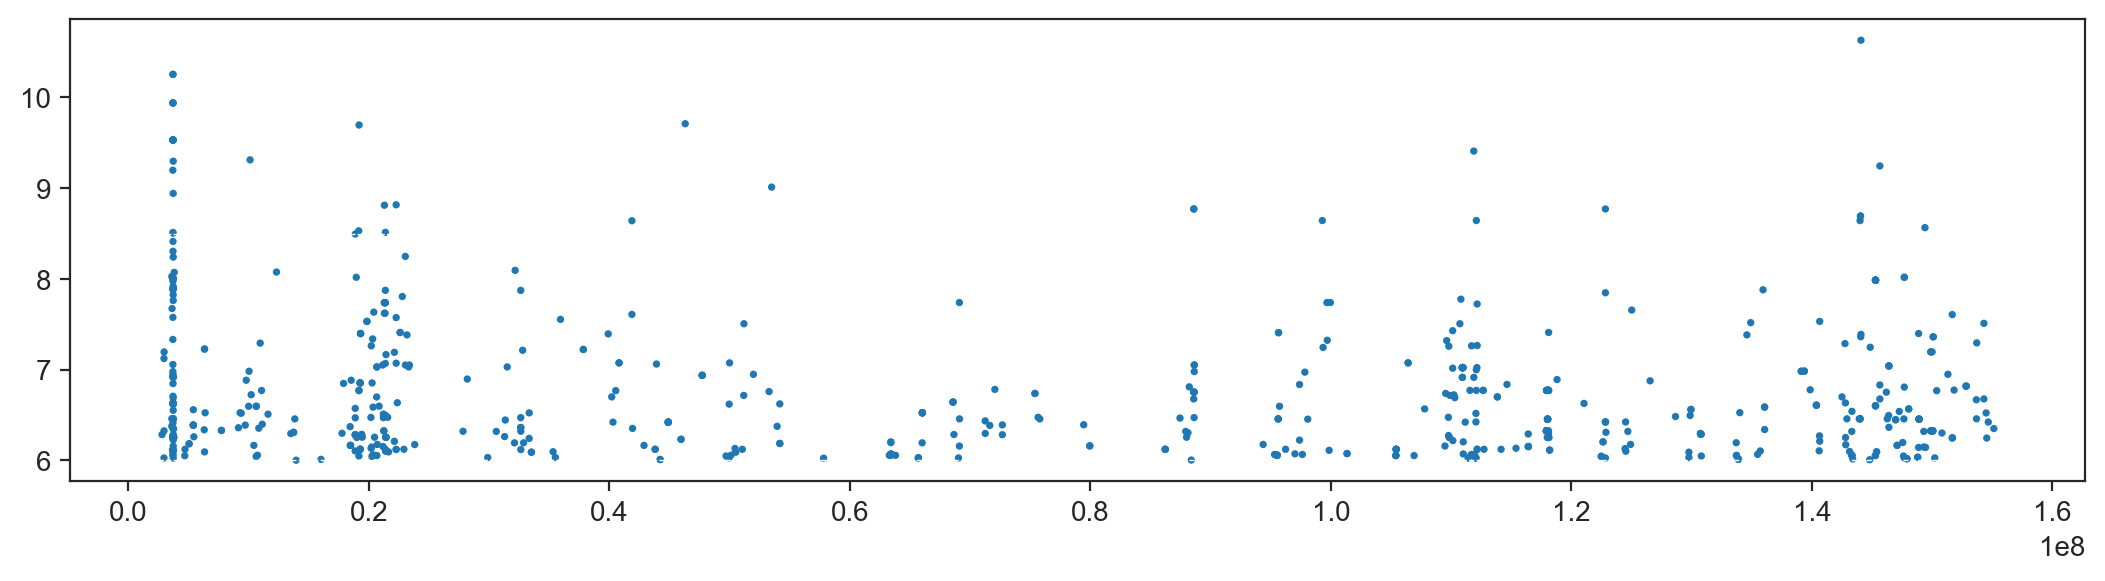

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(13, 3))
ax.scatter(snp_data.pos, snp_data.neglog10p, s=7, ec='none')
ax.axhline(8.5, lw=.5, ls='--', c='w')
ax.axhline(6, lw=.5, ls='--', c='w') ;   

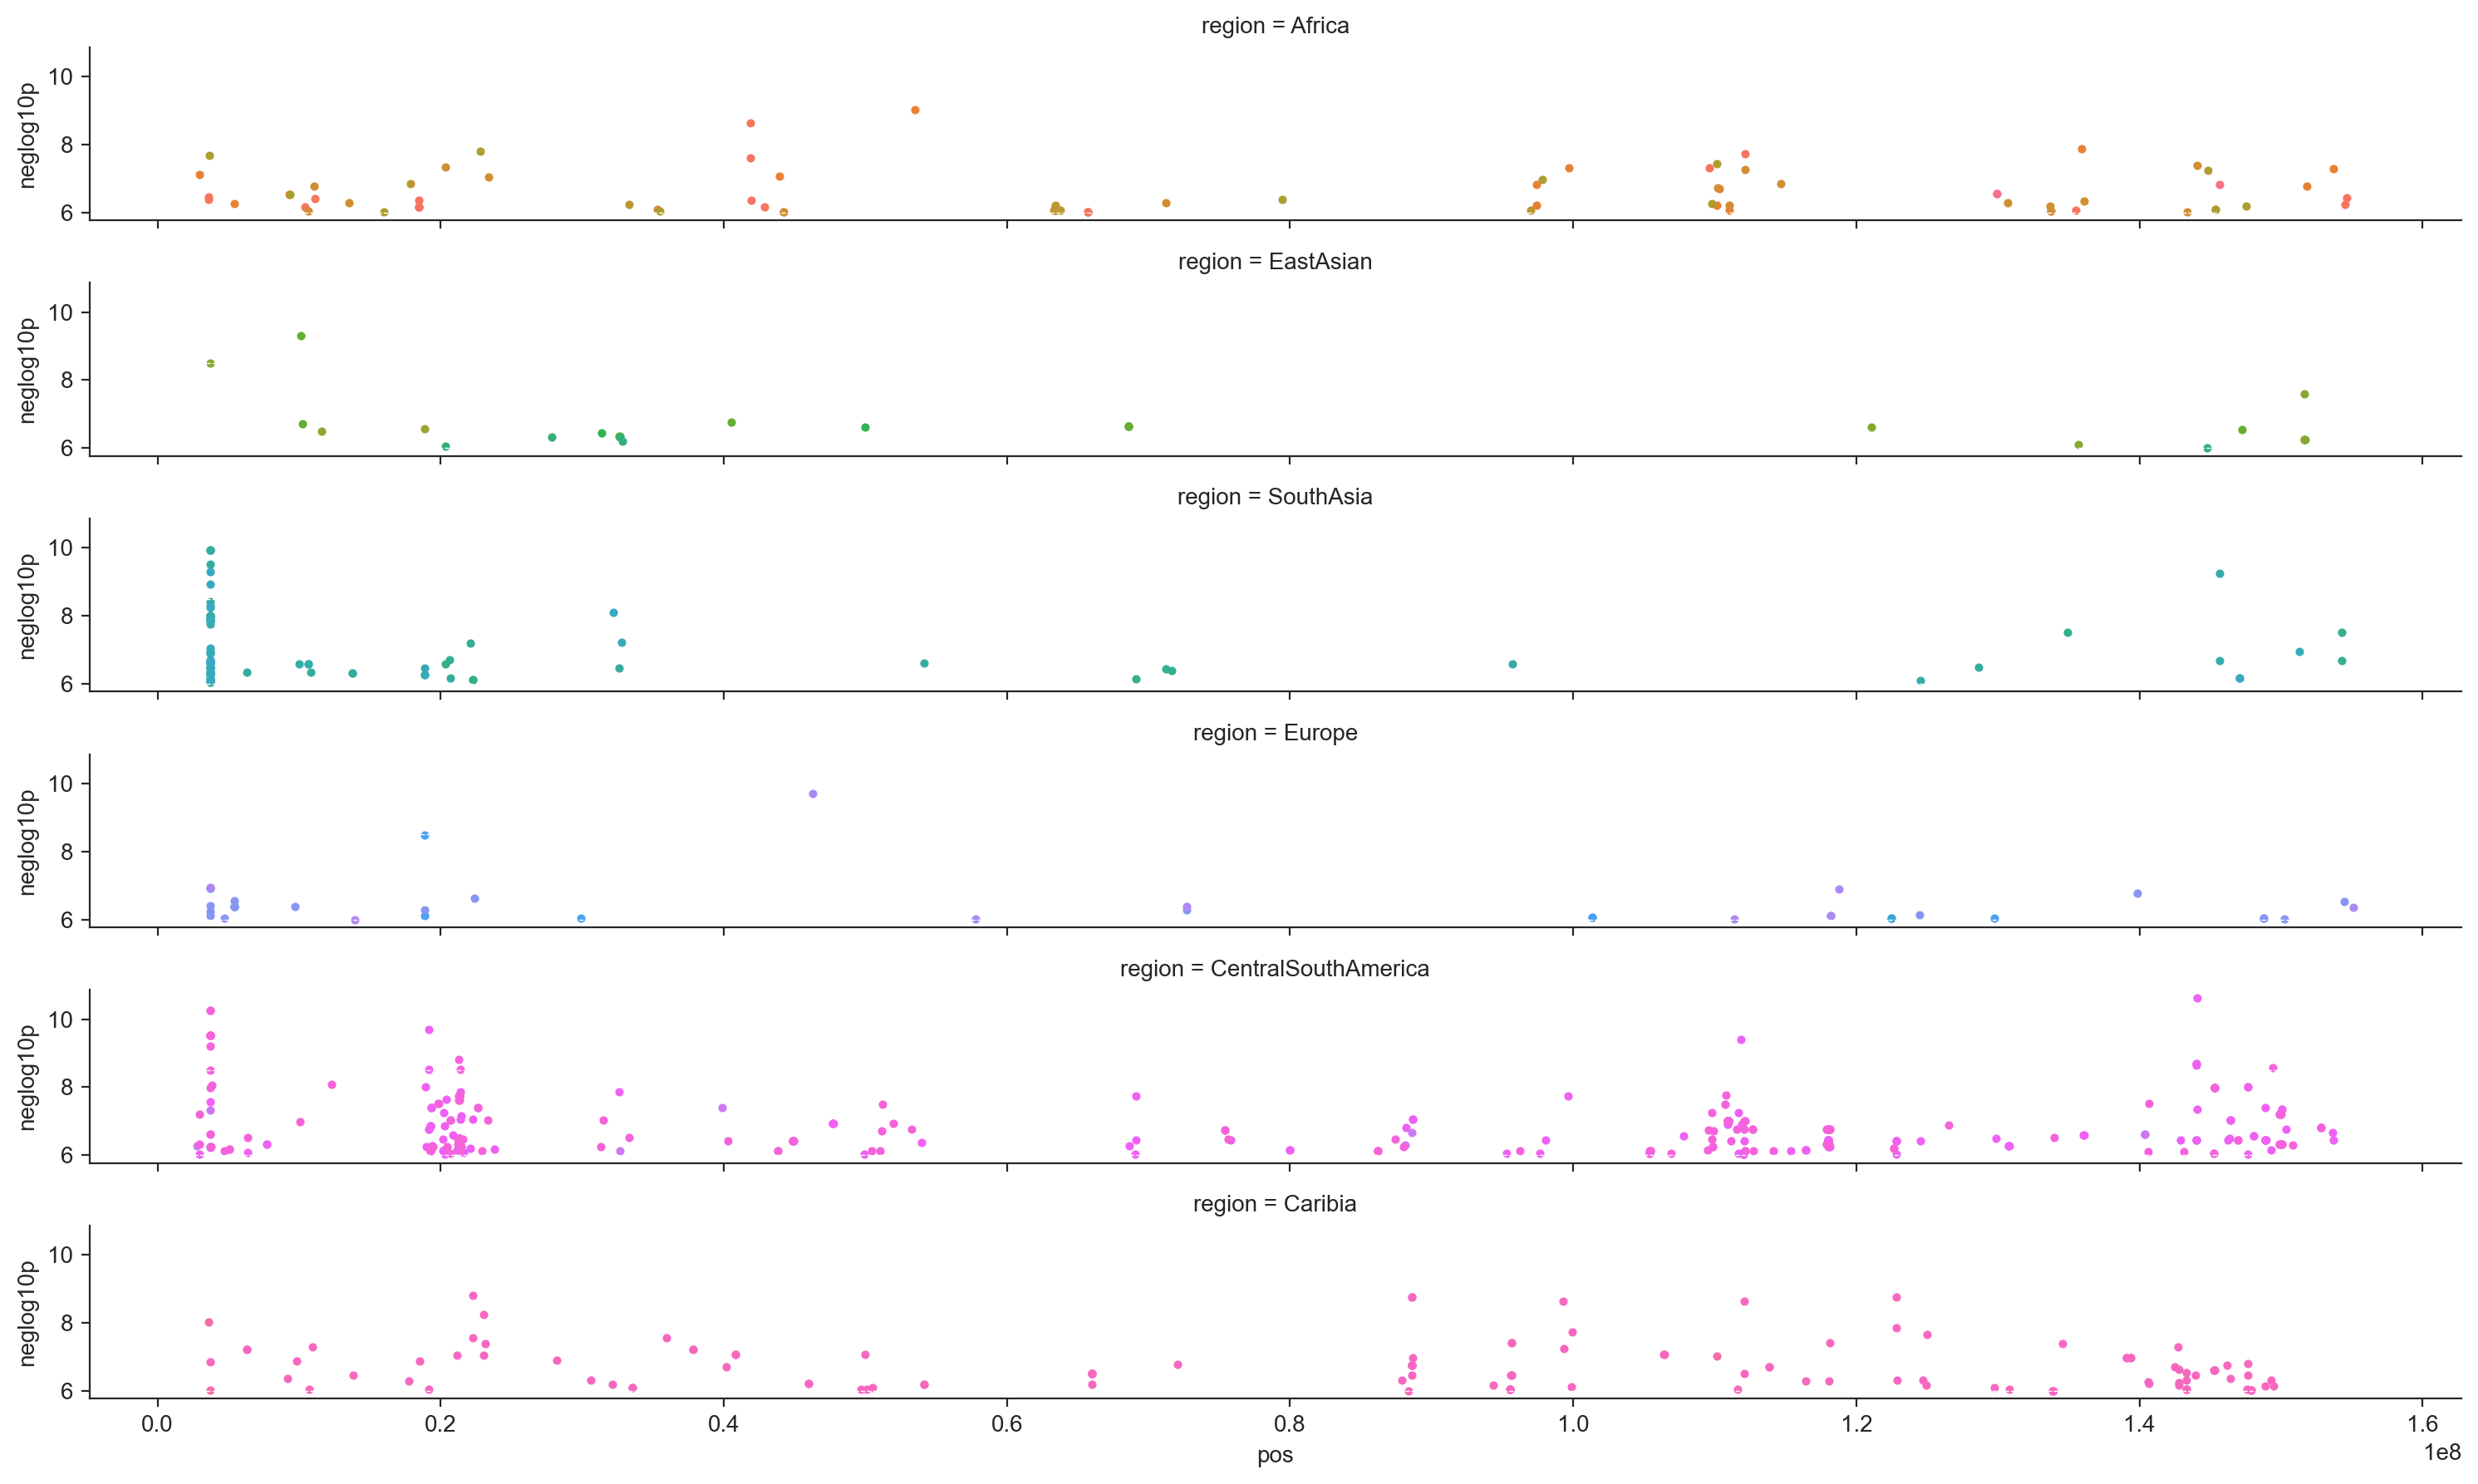

In [11]:
g = sns.FacetGrid(snp_data.loc[snp_data.neglog10p > 3], row='region', hue='population', height=1.5, aspect=10)
g.map(plt.scatter, "pos", "neglog10p", s=7) ;
for ax in g.axes.flat:
    ax.axhline(8.5, lw=.5, ls='--', c='w')
    ax.axhline(6, lw=.5, ls='--', c='w') 

In [12]:
(gene_lists.get('cDEG').fisher(chrX_signif_by_region['Africa'], background=all_genes_chrX))

0.03314574227602989

## DEG overlap to relate

In [13]:
p = gene_lists.get('cDEG').fisher(genes_chrX_signif, background=all_genes_chrX)
print(f"{p:.5f} {stars(p)}")

0.00759 *


In [14]:
p = gene_lists.get('nDEG').fisher(genes_chrX_signif, background=all_genes_chrX)
print(f"{p:.5f} {stars(p)}")

0.05449 


In [15]:
for population, region in pop_reg_map.items():
    p = gene_lists.get('cDEG').fisher(chrX_signif_by_pop[population], background=all_genes_chrX)
    print(f"{region:<20} {population}  {p:.5f} {stars(p)}")

Africa               ASW  1.00000 
Africa               ESN  0.36724 
Africa               GWD  0.04446 *
Africa               LWK  0.02122 *
Africa               MSL  0.02624 *
Africa               YRI  0.03315 *
EastAsian            CDX  0.03831 *
EastAsian            CHB  0.04842 *
EastAsian            CHS  0.08287 
EastAsian            JPT  0.09808 
EastAsian            KHV  0.10266 
SouthAsia            PJL  0.15112 
SouthAsia            BEB  0.17103 
SouthAsia            GIH  0.17689 
SouthAsia            STU  0.17689 
SouthAsia            ITU  0.17689 
Europe               GBR  0.17986 
Europe               FIN  0.21361 
Europe               IBS  0.26257 
Europe               TSI  0.28975 
CentralSouthAmerica  MXL  0.31048 
CentralSouthAmerica  CLM  0.11205 
CentralSouthAmerica  PEL  0.09532 
Caribia              PUR  0.00759 *
Caribia              ACB  0.00759 *


In [16]:
for population, region in pop_reg_map.items():
    p = gene_lists.get('nDEG').fisher(chrX_signif_by_pop[population], background=all_genes_chrX)
    print(f"{region:<20} {population}  {p:.5f} {stars(p)}")

Africa               ASW  1.00000 
Africa               ESN  0.71587 
Africa               GWD  0.17499 
Africa               LWK  0.17504 
Africa               MSL  0.20989 
Africa               YRI  0.25449 
EastAsian            CDX  0.14292 
EastAsian            CHB  0.18313 
EastAsian            CHS  0.31043 
EastAsian            JPT  0.36135 
EastAsian            KHV  0.37607 
SouthAsia            PJL  0.20392 
SouthAsia            BEB  0.13493 
SouthAsia            GIH  0.14312 
SouthAsia            STU  0.14312 
SouthAsia            ITU  0.14312 
Europe               GBR  0.14731 
Europe               FIN  0.19751 
Europe               IBS  0.16452 
Europe               TSI  0.19990 
CentralSouthAmerica  MXL  0.22854 
CentralSouthAmerica  CLM  0.12214 
CentralSouthAmerica  PEL  0.12466 
Caribia              PUR  0.05449 
Caribia              ACB  0.05449 


## Overlap to all relate & ech90

(signif genes in ECH regions)

In [17]:
p = gene_lists.get('cDEG').fisher(
        genes_chrX_signif & gene_lists.get('ech90_regions'),
        background=all_genes_chrX)
print(f"{p:.5f} {stars(p)}")

0.00070 **


In [18]:
p = gene_lists.get('nDEG').fisher(
        genes_chrX_signif & gene_lists.get('ech90_regions'),
        background=all_genes_chrX)
print(f"{p:.5f} {stars(p)}")

0.02755 *


## Overlap to all relate | ech90

In [21]:
p = gene_lists.get('cDEG').fisher(
        genes_chrX_signif | gene_lists.get('ech90_regions'),
        background=all_genes_chrX)
print(f"{p:.5f} {stars(p)}")

0.02824 *


In [22]:
p = gene_lists.get('nDEG').fisher(
        genes_chrX_signif | gene_lists.get('ech90_regions'),
        background=all_genes_chrX)
print(f"{p:.5f} {stars(p)}")

0.08609 


In [23]:
p = gene_lists.get('nDEG').fisher(
        genes_chrX_signif & gene_lists.get('ech90_regions') & gene_lists.get('hum_nean_admix'),
        background=all_genes_chrX)
print(f"{p:.5f} {stars(p)}")

0.00055 **


In [24]:
candiate_genes = (
    genes_gl_signif 
    | gene_lists.get('ech90_regions') 
    | gene_lists.get('hum_nean_admix') 
    # | gene_lists.get('pure_hama')
)
gene_lists.get('cDEG')  << candiate_genes

CFAP47,EDA,HUWE1,PHF8,SCML1,UPF3B
DDX3X,EIF1AX,IQSEC2,PRICKLE3,SRPX2,VSIG1
DIAPH2,EMD,mc_ampl_SPANXN5,RBM41,SYP,
DYNLT3,HTR2C,OCRL,RTL4,SYTL5,


In [25]:
gene_lists.get('cDEG').fisher(candiate_genes, all_genes_chrX)

0.004641318650932143

In [26]:
gene_lists.get('nDEG').fisher(candiate_genes, all_genes_chrX)

0.02850936461108852

In [27]:
snp_data_max_neglog10p = snp_data.groupby(['chrom', 'pos']).agg('max', numeric_only=True).reset_index()

In [28]:
snp_data_max_neglog10p.head()

,chrom,pos,neglog10p
0,chrX,2801257,6.28387
1,chrX,2961533,7.12284
2,chrX,2962736,6.02646
3,chrX,2967682,6.32495
4,chrX,2973936,7.19512


In [29]:
df = snp_data_max_neglog10p.rename(columns={'pos': 'x', 'neglog10p': 'y'})
df = df.loc[df.y > 6]
df

,chrom,x,y
0,chrX,2801257,6.28387
1,chrX,2961533,7.12284
2,chrX,2962736,6.02646
3,chrX,2967682,6.32495
4,chrX,2973936,7.19512
...,...,...,...
574,chrX,154301540,7.51023
575,chrX,154482966,6.52233
576,chrX,154536002,6.24571
577,chrX,154663327,6.42215


In [30]:
cdeg = glist([x.replace('mc_ampl_', '') for x in gene_lists.get('cDEG')])
cdeg

CFAP47,DYNLT3,EMD,IQSEC2,PHF8,RTL4,SYP,VSIG1
DDX3X,EDA,HTR2C,SPANXN5,PRICKLE3,SCML1,SYTL5,
DIAPH2,EIF1AX,HUWE1,OCRL,RBM41,SRPX2,UPF3B,


In [31]:
ndeg = glist([x.replace('mc_ampl_', '') for x in gene_lists.get('nDEG')])
#ndeg[ndeg.index('mc_ampl_SPANXN5')] = 'SPANXN5'
ndeg

ABRA,CDKN2A,DIAPH2,FLVCR2,IL7,NCBP2L,PPP1R9A,SVIP,VCAN,HSFX3
ACTL10,CENPW,DLG2,FSCB,IQCM,NDUFB6,PRICKLE3,SYP,WWC2,HSFY2
ACTRT3,CFAP47,DMAC2L,GATA1,IQSEC2,NFAM1,PTTG1,SYTL5,ZCCHC13,MAOA
ADAM29,CIB4,DNAAF6,GATAD1,IZUMO2,NLK,RAI14,TEX15,ZFC3H1,MTMR1
AFF2,CLASP1,DNAH10,GCA,KATNAL1,NRG4,RBM41,TEX38,ZFY,NXF3
AKAP14,CLDND2,DNAH12,GHR,KIAA1143,NUSAP1,RIBC1,TMEM243,ZMAT1,PABIR2
ALG14,CMC1,DUSP21,GINS3,KLHL10,OCRL,RMDN2,TMEM45A,ZNF490,PABPC1L2A
ANKRD28,CNBD1,DYNLT3,GLOD5,LAS1L,OFD1,RPGR,TMEM89,ZNRF4,PHKA2
ANXA10,COL4A6,EDA,GPR85,LINC01584,OIP5,RTL4,TPP2,BEX2,PRDX4
ARMH2,COPRS,EFHC2,H2AC20,LONRF1,OSBP2,SAR1B,TPRG1,CDY1,SPACA5
AVL9,COX6C,EIF1AX,H2AP,LRBA,PAH,SCUBE3,TRDN,CLCN4,SPANXN5


In [32]:
gi.gene_labels(cdeg, assembly='hg38')

[('chrX', 36152525.0, 'CFAP47'),
 ('chrX', 41348889.5, 'DDX3X'),
 ('chrX', 97144919.0, 'DIAPH2'),
 ('chrX', 37843203.0, 'DYNLT3'),
 ('chrX', 69827792.0, 'EDA'),
 ('chrX', 20133181.0, 'EIF1AX'),
 ('chrX', 154380408.5, 'EMD'),
 ('chrX', 114747073.0, 'HTR2C'),
 ('chrX', 53609407.0, 'HUWE1'),
 ('chrX', 53273581.0, 'IQSEC2'),
 ('chrX', 52796785.0, 'SPANXN5'),
 ('chrX', 129566407.0, 'OCRL'),
 ('chrX', 53992807.5, 'PHF8'),
 ('chrX', 49180587.0, 'PRICKLE3'),
 ('chrX', 107085461.5, 'RBM41'),
 ('chrX', 112270263.0, 'RTL4'),
 ('chrX', 17746056.0, 'SCML1'),
 ('chrX', 100659993.0, 'SRPX2'),
 ('chrX', 49194003.5, 'SYP'),
 ('chrX', 38008867.0, 'SYTL5'),
 ('chrX', 119829136.5, 'UPF3B'),
 ('chrX', 108049031.0, 'VSIG1')]

In [33]:
ech90 = pd.read_csv('ech90.tsv', sep='\t', names=['chrom', 'start', 'end'])
map(tuple, ech90.itertuples())

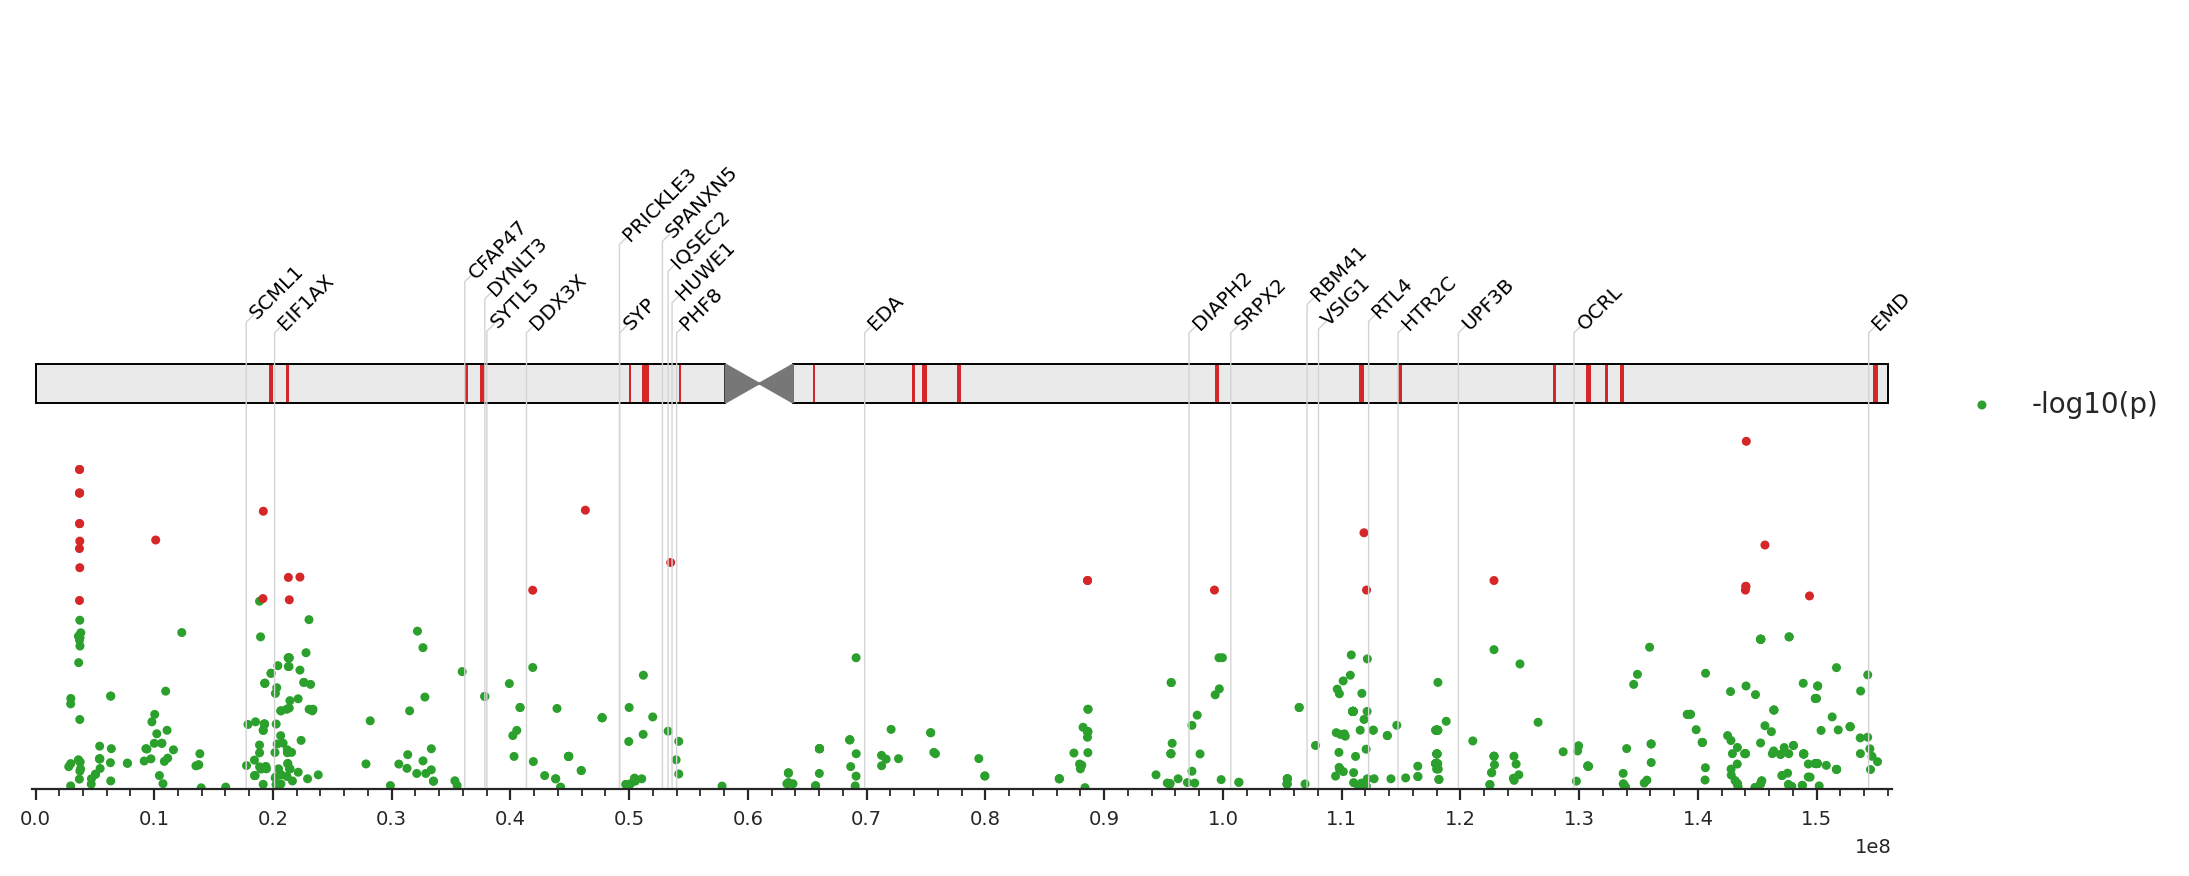

In [34]:
g = gplt.ChromIdeogram('chrX', assembly='hg38', ylim=(0, 20), axes_height_inches=5, font_size=2)
g.draw_chromosomes(base=10, height=1)
g.add_labels(gi.gene_labels(cdeg, assembly='hg38'), base=0, min_height=g.ideogram_base+g.ideogram_height+1)
g.add_segments(ech90.itertuples(index=False), fc='tab:red') 
g.map_method(Axes.scatter, data=df, x='x', y='y', yaxis=(0, 9), s=5, c=[f'C{x+2}' for x in (df.y > 8.5).astype(int)], label='-log10(p)')
# g.map_method(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.5, 4), size='y', c='C1', label='seaborn')
g.add_legend('right')

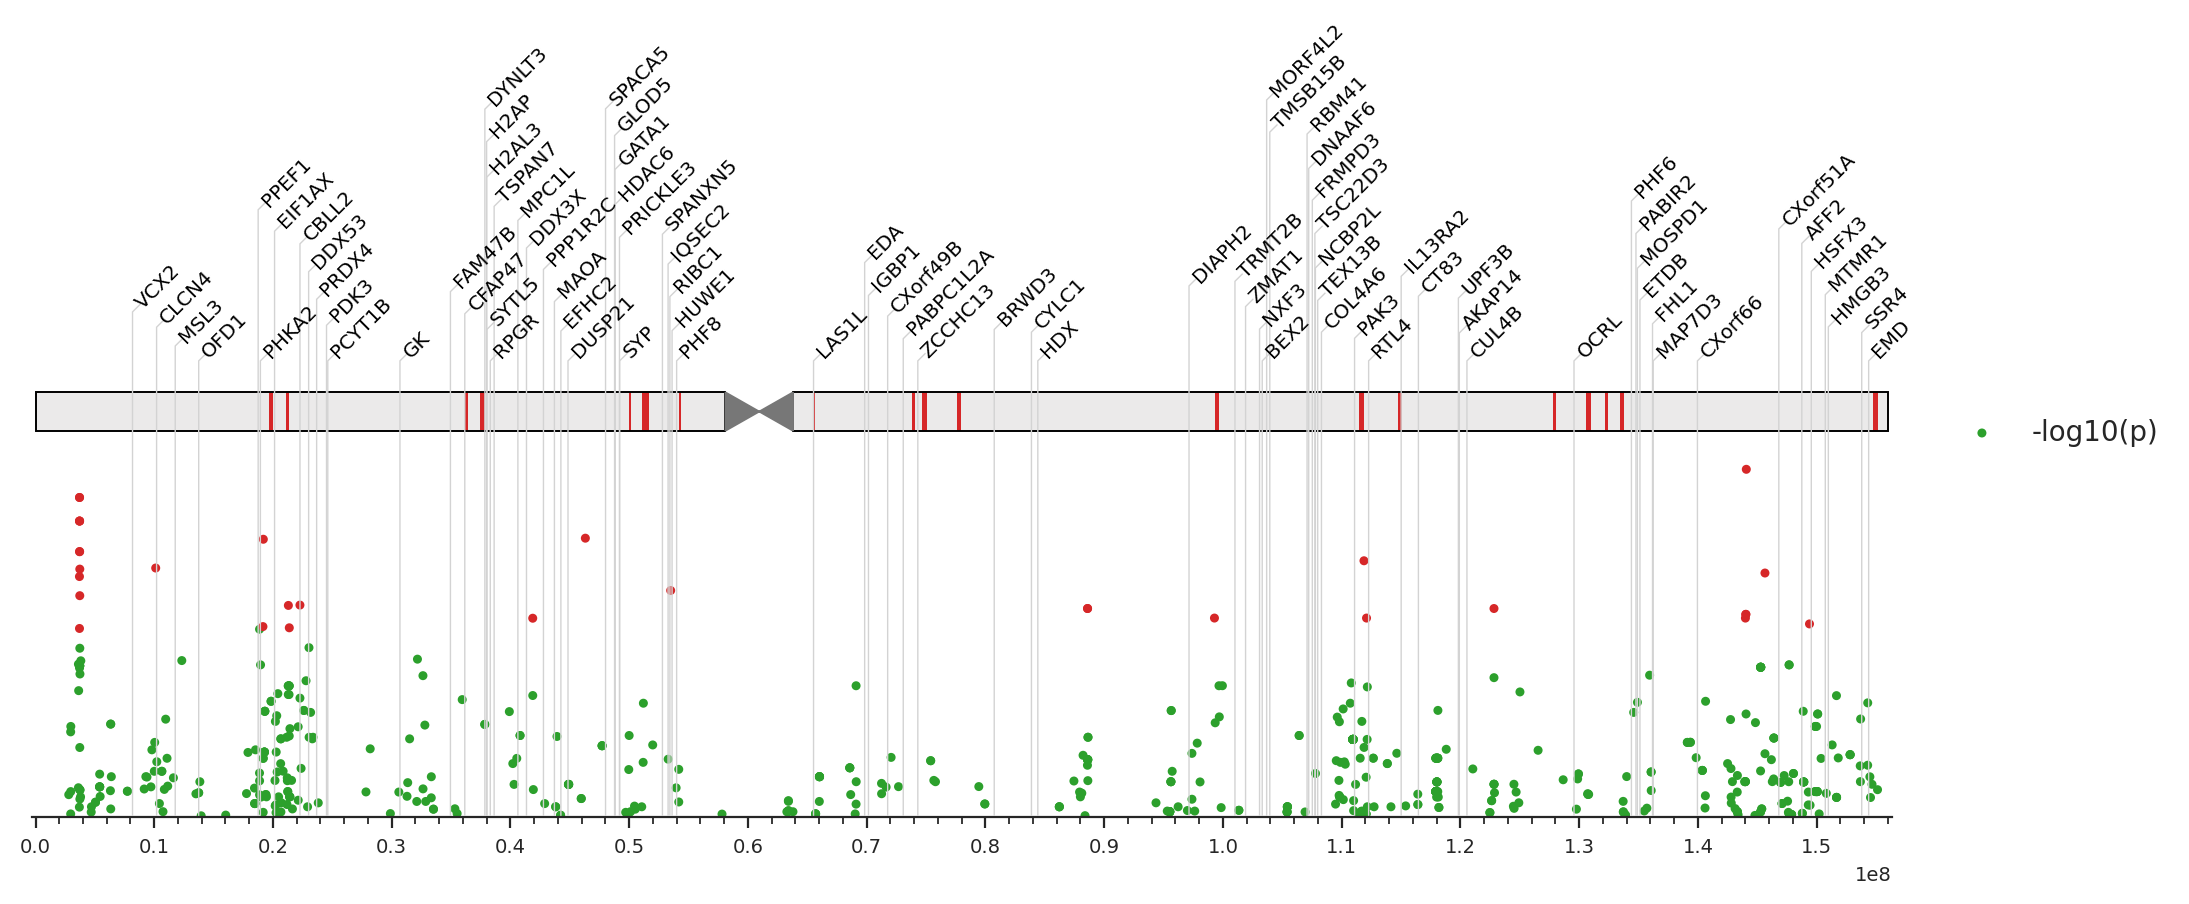

In [35]:
g = gplt.ChromIdeogram('chrX', assembly='hg38', ylim=(0, 20), axes_height_inches=5, font_size=2)
g.draw_chromosomes(base=10, height=1)
g.add_labels(gi.gene_labels(ndeg, assembly='hg38'), base=0, min_height=g.ideogram_base+g.ideogram_height+1)
g.add_segments(ech90.itertuples(index=False), fc='tab:red') 
g.map_method(Axes.scatter, data=df, x='x', y='y', yaxis=(0, 9), s=5, c=[f'C{x+2}' for x in (df.y > 8.5).astype(int)], label='-log10(p)')
# g.map_method(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.5, 4), size='y', c='C1', label='seaborn')
g.add_legend('right')

In [38]:
population = 'YRI'
ts = tskit.load(f'../steps/relate/{population}/haplotypes_demog_trees.trees')  

for tree in ts.trees():
    for node in tree.nodes():
        # Get the number of samples (descendants) in the subtree rooted at this node
        num_descendants[node] += tree.num_samples(node)

NameError: name 'num_descendants' is not defined

In [39]:


# def compute_span_per_clade_size(ts: tskit.TreeSequence) -> dict:
#     """
#     Computes the length of the sequence spanned by each node divided by the clade size.

#     Parameters:
#         ts (tskit.TreeSequence): A tskit TreeSequence object.

#     Returns:
#         dict: A dictionary where keys are node IDs and values are the span per clade size.
#     """
#     span_per_clade_size = {}

#     for tree in ts.trees():
#         for node in tree.nodes():
#             # Get the length of the sequence spanned by the node
#             span = tree.span
#             # Get the clade size (number of samples in the subtree rooted at the node)
#             clade_size = tree.num_samples(node)
#             # Compute the span per clade size
#             if clade_size > 0:  # Avoid division by zero
#                 span_per_clade_size[node] = span / clade_size
#             else:
#                 span_per_clade_size[node] = 0

#     return span_per_clade_size

# # Load a tree sequence
# population = 'YRI'
# ts = tskit.load(f'../steps/relate/{population}/haplotypes_demog_trees.trees')    

# # Compute span per clade size
# result = compute_span_per_clade_size(ts)

# # Print the result for each node
# for node, value in result.items():
#     print(f"Node {node}: Span per clade size = {value}")

def compute_span_per_clade_size(ts: tskit.TreeSequence) -> dict:
    """
    Computes the total length of the sequence spanned by each node divided by the clade size,
    considering spans across the entire tree sequence.

    Parameters:
        ts (tskit.TreeSequence): A tskit TreeSequence object.

    Returns:
        dict: A dictionary where keys are node IDs and values are the span per clade size.
    """
    span_per_clade_size = {node: 0 for node in range(ts.num_nodes)}

    # Compute the total span for each node by summing the spans of edges connected to it
    for edge in ts.edges():
        span = edge.right - edge.left
        span_per_clade_size[edge.parent] += span

    # Compute the span per clade size for each node
    for node in range(ts.num_nodes):
        clade_size = ts.num_samples(node)
        if clade_size > 0:  # Avoid division by zero
            span_per_clade_size[node] /= clade_size
        else:
            span_per_clade_size[node] = 0

        if len(span_per_clade_size[node]) > 20:
            break

    return span_per_clade_size

# Load a tree sequence
population = 'YRI'
ts = tskit.load(f'../steps/relate/{population}/haplotypes_demog_trees.trees')    

# Compute span per clade size
result = compute_span_per_clade_size(ts)

# Print the result for each node
for node, value in result.items():
    print(f"Node {node}: Span per clade size = {value}")

TypeError: 'int' object is not callable

In [ ]:


import tskit

def compute_tmrca_half(tree: tskit.Tree) -> float:
    """
    Computes the time at which at least half of the samples form a single clade (TMRCA_half) in a tskit tree.

    Parameters:
        tree (tskit.Tree): A tskit Tree object.

    Returns:
        float: The TMRCA_half value.
    """
    # Get the list of all sample nodes
    samples = list(tree.samples())
    num_samples = len(samples)
    half_samples = num_samples // 2

    # Traverse the tree in postorder (from leaves to root)
    for node in tree.nodes(order="postorder"):
        # Get the number of samples in the subtree rooted at this node
        num_descendants = tree.num_samples(node)
        
        # Check if this node's subtree contains at least half of the samples
        if num_descendants >= half_samples:
            # Return the time of this node
            return tree.time(node) / tree.time(tree.root)
    
    # If no such node is found (shouldn't happen in a valid tree), return None
    return None

import tskit


def tmrca_half(population):
    ts = tskit.load(f'../steps/relate/{population}/haplotypes_demog_trees.trees')    
    pos = []
    _tmrca_half = []
    for tree in ts.trees():
        pos.append((tree.interval.left+tree.interval.right)/2)
        _tmrca_half.append(compute_tmrca_half(tree))
        
    fig, ax = plt.subplots(1, 1, figsize=(25, 2), sharex=True)
    ax.scatter(pos, _tmrca_half, s=2, c='tab:green')
    ax.set_title(population)
    ax.set_ylabel("tmrca_half");
    ax.set_yscale("log")
    ax.set_xlim(left=0);  

def plot(population):
    ts = tskit.load(f'../steps/relate/{population}/haplotypes_demog_trees.trees')    
    num_windows = 15000
    windows = np.linspace(0, ts.sequence_length, num_windows + 1)
    pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(num_windows)]
    
    fig, ax = plt.subplots(3, 1, figsize=(25, 5), sharex=True)
    ax[0].scatter(pos, ts.Tajimas_D(windows=windows), s=2, c='tab:blue', alpha=1) ;
    ax[0].set_ylabel("Tajima's D")
    ax[0].set_title(population)
    ax[1].scatter(pos, ts.diversity(windows=windows), s=2, c='tab:brown', alpha=1)
    ax[1].set_ylabel("diversity", alpha=1);
    ax[1].set_yscale("log")
    ax[1].set_xlim(left=0);

    pos = []
    _tmrca_half = []
    for tree in ts.trees():
        pos.append((tree.interval.left+tree.interval.right)/2)
        _tmrca_half.append(compute_tmrca_half(tree))
        
    ax[2].scatter(pos, _tmrca_half, s=2, c='tab:green')
    ax[2].set_ylabel("tmrca_half");
    ax[2].set_yscale("log")
    ax[2].set_xlim(left=0)

    plt.tight_layout()
    
def tajimas_d(population):
    ts = tskit.load(f'../steps/relate/{population}/haplotypes_demog_trees.trees')        
    num_windows = 15000
    windows = np.linspace(0, ts.sequence_length, num_windows + 1)
    pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(num_windows)]
    
    fig, ax = plt.subplots(1, 1, figsize=(25, 2), sharex=True)
    ax.scatter(pos, ts.Tajimas_D(windows=windows), s=2, c='tab:blue') ;
    ax.set_title(population)
    ax.set_ylabel("Tajima's D")
    ax.set_title(population)

def diversity(population):
    ts = tskit.load(f'../steps/relate/{population}/haplotypes_demog_trees.trees')            
    num_windows = 15000
    windows = np.linspace(0, ts.sequence_length, num_windows + 1)
    pos = [windows[i] + (windows[i+1]-windows[i])/2 for i in range(num_windows)]
    
    fig, ax = plt.subplots(1, 1, figsize=(25, 2), sharex=True)
    ax.scatter(pos, ts.diversity(windows=windows), s=2, c='tab:brown')
    ax.set_title(population)
    ax.set_ylabel("diversity");
    ax.set_yscale("log")
    ax.set_xlim(left=0);    

In [ ]:
plot('YRI')

In [ ]:
for population in populations:
    tajimas_d(population)

In [ ]:
for population in populations:
    diversity(population)

In [ ]:
  for population in populations:
    tmrca_half(population)

## Combine relate stat with a time-based p-value from trmca_half

For tmrca_half I can just (conservatively) use the empirical distribution as null-distribution.

Or, maybe better: Given an epoch demography I can compute the expexted distribution of tmrca_half, I.e. the distribution of the first n/2 level heights relative the tmrca in a block coalescent. Compute the histogram of level heights 

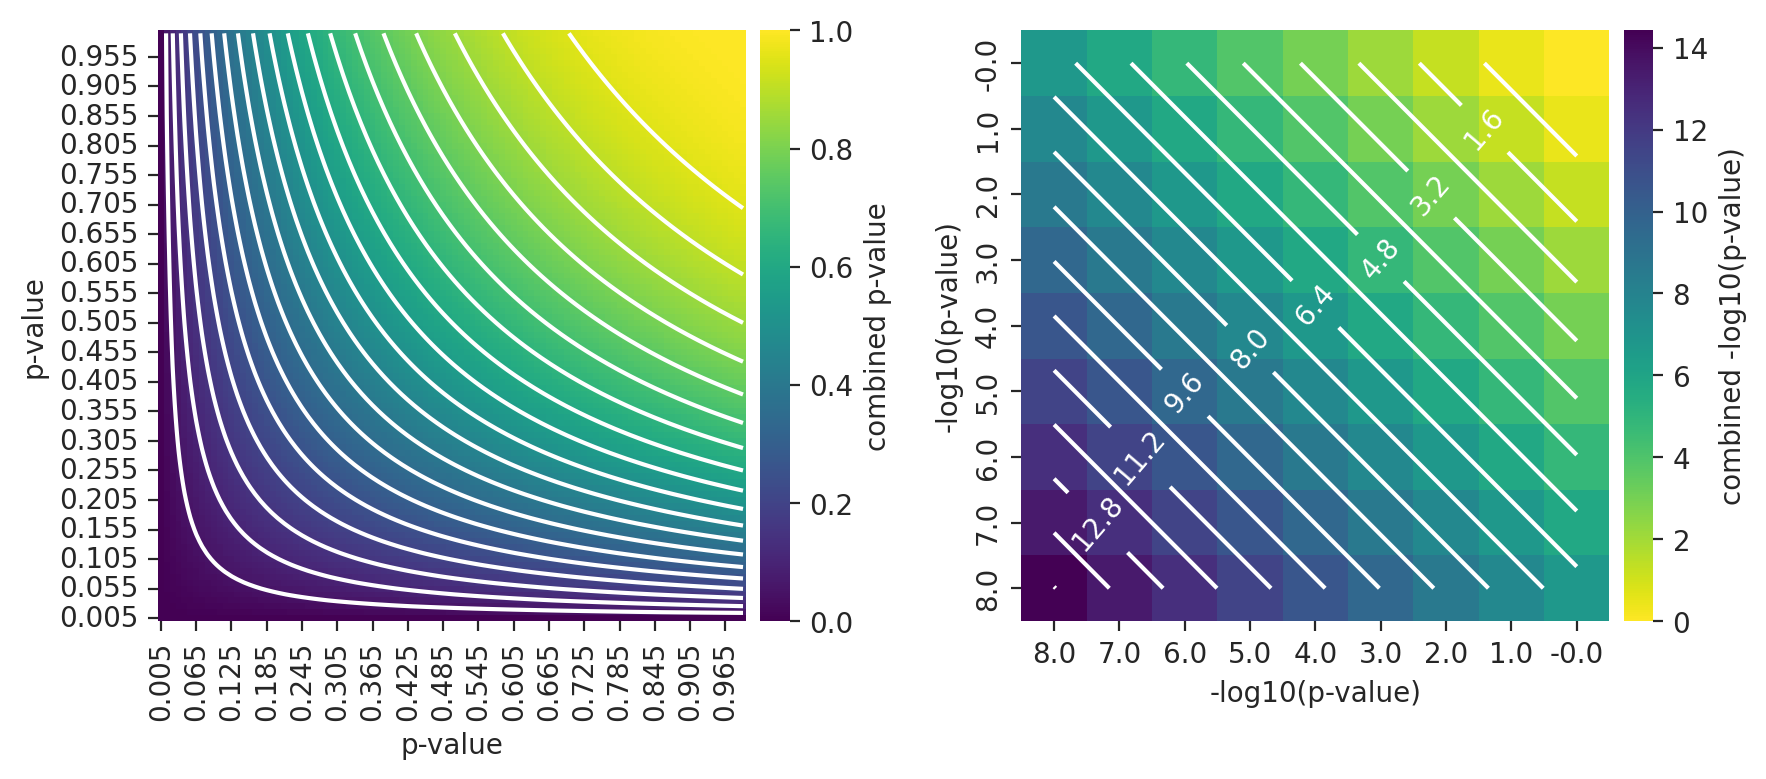

In [40]:
import itertools 
from scipy.stats import chi2
from matplotlib.ticker import FuncFormatter

def fisher_method(pvalues):
    return 1-chi2.cdf(-2 * np.log(pvalues).sum(), 2 * pvalues.size)

def fisher_method_log10(pvalues):
    return -np.log10(fisher_method(pvalues))

cmap = 'viridis'
n = 100
x = np.linspace(1e-10, 1, n)
a = np.array(list(itertools.product(x, x)))
b = np.apply_along_axis(fisher_method, 1, a)
c = b.reshape(n, n)
data = pd.DataFrame(c)
data.index = x
data.columns = x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

sns.heatmap(data=data, cmap=f'{cmap}', cbar_kws={'pad': 0.02, 'label': 'combined p-value'}, ax=ax1)
ax1.contour(np.arange(.5, data.shape[1]), np.arange(.5, data.shape[0]), data, levels=20, colors='white')
ax1.invert_yaxis()
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.3g}'.format(x/100)))
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.3g}'.format(x/100)))
ax1.set_xlabel('p-value')
ax1.set_ylabel('p-value')

pmin = -8
n = -pmin*1+1
# x = np.logspace(1e-10, 1, n)
x = np.logspace(-8, 0, n)
a = np.array(list(itertools.product(x, x)))
b = np.apply_along_axis(fisher_method_log10, 1, a)
c = b.reshape(n, n)
data = pd.DataFrame(c)
data.index = np.round(-np.log10(x), 1)
data.columns = np.round(-np.log10(x), 1)

sns.heatmap(data=data, cmap=f'{cmap}_r', cbar_kws={'pad': 0.02, 'label': 'combined -log10(p-value)'}, ax=ax2)
cs = ax2.contour(np.arange(.5, data.shape[1]), np.arange(.5, data.shape[0]), data, levels=20, colors='white')

def fmt(x):
    return np.round(x,2)

ax2.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)
ax2.invert_yaxis()
ax2.set_xlabel('-log10(p-value)')
ax2.set_ylabel('-log10(p-value)')
plt.tight_layout()